# Project 1

### Part a: Ordinary Least Square (OLS) for the Runge function

In [235]:
# Imports
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [236]:
# Defining the Runge function
def f(x):
    return 1/(1+25*x**2)

In [237]:
n = 500
x = np.random.uniform(-1, 1, n)
y = f(x) + 0.025*np.random.normal(0, 1, n)

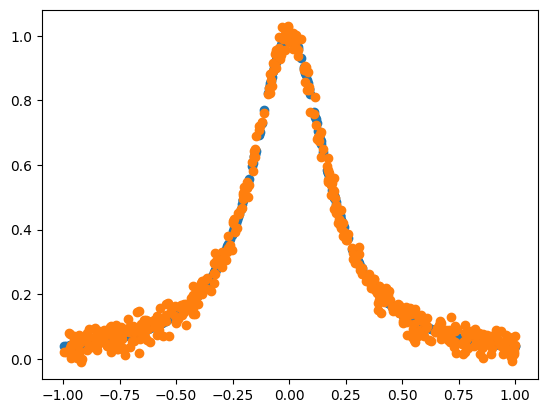

In [238]:

plt.scatter(x, f(x)) 
plt.scatter(x, y)
plt.show()

In [239]:
def OLS_parameters(X, y):
    X_transpose = np.transpose(X)
    return np.linalg.pinv(X_transpose @ X) @ X_transpose @ y

def Ridge_parameters(X, y, lambda_reg = 0.1):
    pred = X.shape[1]
    I = np.eye(pred) # size: (p,p)

    return np.linalg.inv((X.T @ X)+I*lambda_reg) @ X.T @ y

In [240]:
def polynomial_features(x, p, intercept = False):
    n = len(x)
    if intercept:
        X = np.zeros((n,p+1))
        for i in range(p+1):
            X[:, i] = x**i
    else:
        X = np.zeros((n, p))
        for i in range(1, p + 1):
            X[:, i - 1] = x ** i
    return X

In [241]:
def MSE(y, y_pred):
    return 1/n * np.sum((y-y_pred)**2)

def R2(y, y_pred):
    return 1 - np.sum((y-y_pred)**2)/np.sum((y-np.mean(y))**2)

In [242]:
MAX_POLYNOMIAL_DEGREE = 20
MIN_POLYNOMIAL_DEGREE = 2

mse_values = np.zeros(MAX_POLYNOMIAL_DEGREE-MIN_POLYNOMIAL_DEGREE+1)
r2_values = np.zeros(MAX_POLYNOMIAL_DEGREE-MIN_POLYNOMIAL_DEGREE+1)

polynomial_degrees = range(MIN_POLYNOMIAL_DEGREE, MAX_POLYNOMIAL_DEGREE+1)
for p in polynomial_degrees:
    X = polynomial_features(x, p)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_s = scaler.transform(X_train)
    X_test_s = scaler.transform(X_test)
    y_offset = np.mean(y_train)
    theta = OLS_parameters(X_train_s, y_train - y_offset)
    y_pred = X_test_s @ theta + y_offset
    ols_mse = MSE(y_test, y_pred)
    ols_r2 = R2(y_test, y_pred)
    mse_values[p-MIN_POLYNOMIAL_DEGREE] = ols_mse
    r2_values[p-MIN_POLYNOMIAL_DEGREE] = ols_r2

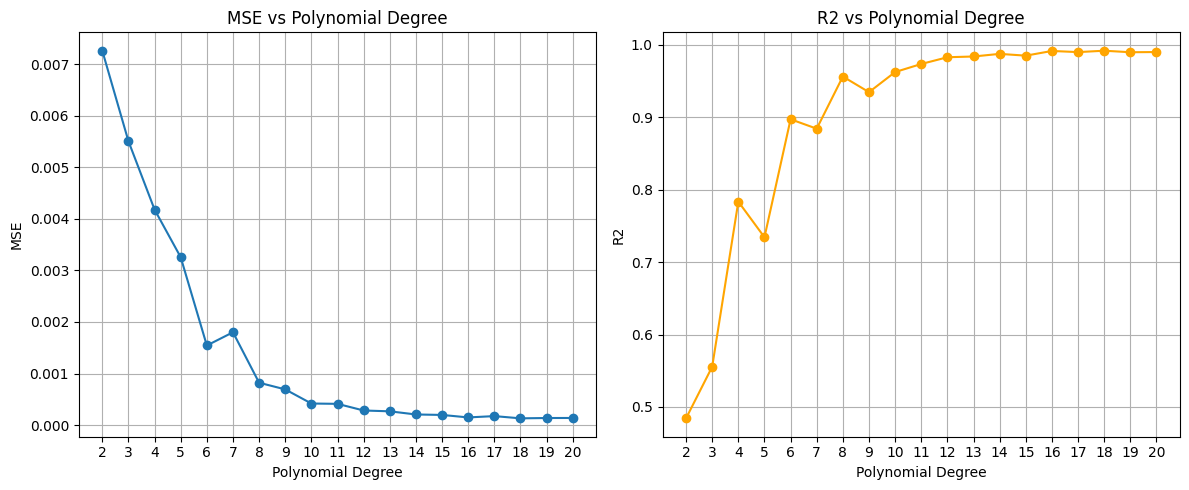

In [243]:
# Plot the MSE and R2 values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(polynomial_degrees, mse_values, marker='o')
plt.title('MSE vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.xticks(polynomial_degrees)
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(polynomial_degrees, r2_values, marker='o', color='orange')
plt.title('R2 vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('R2')
plt.xticks(polynomial_degrees)
plt.grid()

plt.tight_layout()
plt.show()